<h1>EdNet - Optimize Student Performance: Exploratory Data Analysis</h1>

Project GitHub: https://github.com/premonish/EdNet<p>


<b>EdNet is composed of a total of 131,441,538 interactions collected from 784,309 students of Santa since 2017.</b>

"Dataset: there are four datasets named KT1, KT2, KT3, and KT4<p>
The whole dataset is divided by students: {user_id}.csv only contains {user_id}'s interactions.<p>
The timestamps are different from the real values, which are modified (shifted by fixed values) due to security issues.<p>
Download links:
EdNet-KT1 : https://bit.ly/ednet_kt1
|| EdNet-KT2 : https://bit.ly/ednet-kt2
|| EdNet-KT3 : https://bit.ly/ednet-kt3
|| EdNet-KT4 : https://bit.ly/ednet-kt4
|| Contents : https://bit.ly/ednet-content"<p>
 SOURCE: https://github.com/riiid/ednet.git

In [58]:
# I get by with a little help from my friends
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import datetime
import glob

In [2]:
sns.set(color_codes=True)

In [3]:
cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/processed

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\processed


In [4]:
csv_files = glob.glob('*.csv')

In [5]:
len(csv_files)

5

In [6]:
z = 0
df0 = pd.read_csv(csv_files[z], index_col=0)
df0.head()

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,correct,score
0,u11579,1565491145234,1.0,q4236,a,9000.0,0,0,0,0,0.0,b2768,e2768,a,5,86,1572412425061,1,0.751484
1,u11579,1565491161591,2.0,q5370,b,11000.0,0,0,0,0,0.0,b3902,e3902,b,5,106,1571278616386,1,0.751484
2,u11579,1565491185427,3.0,q6382,c,21000.0,0,0,0,0,0.0,b4914,e4914,c,5,85,1562890574926,1,0.751484
3,u11579,1565491207208,4.0,q6722,b,18000.0,0,0,0,0,0.0,b5128,e5128,a,5,77,1571282363112,0,0.751484
4,u11579,1565491240652,5.0,q4771,d,30000.0,0,0,0,0,0.0,b3303,e3303,d,5,119,1561367004862,1,0.751484


In [7]:
df0.describe()

,timestamp,solving_id,elapsed_time,action_type,item_id,source,platform,cursor_time,part,deployed_at,correct,score
count,1.179000e+03,1179.000000,1179.000000,1179.0,1179.0,1179.0,1179.0,1179.0,1179.000000,1.179000e+03,1179.000000,1.179000e+03
mean,1.566569e+12,378.011026,32284.972858,0.0,0.0,0.0,0.0,0.0,4.416455,1.499650e+12,0.751484,7.514843e-01
std,6.578765e+08,210.898641,20063.984590,0.0,0.0,0.0,0.0,0.0,1.744387,2.746975e+11,0.432336,1.799325e-14
min,1.565491e+12,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,-1.000000e+00,0.000000,7.514843e-01
25%,1.565936e+12,199.000000,21000.000000,0.0,0.0,0.0,0.0,0.0,3.000000,1.523119e+12,1.000000,7.514843e-01
50%,1.566471e+12,377.000000,27333.000000,0.0,0.0,0.0,0.0,0.0,5.000000,1.561366e+12,1.000000,7.514843e-01
75%,1.567051e+12,569.000000,37500.000000,0.0,0.0,0.0,0.0,0.0,6.000000,1.568636e+12,1.000000,7.514843e-01
max,1.567842e+12,715.000000,211000.000000,0.0,0.0,0.0,0.0,0.0,7.000000,1.574066e+12,1.000000,7.514843e-01


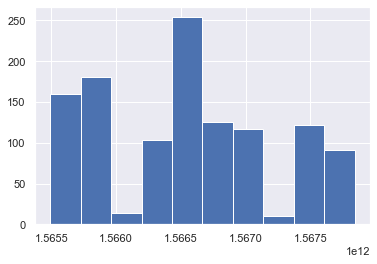

In [8]:
plt.hist(df0.loc[:,'timestamp'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C8C20F108>,
      dtype=object)

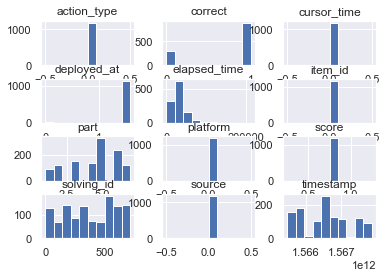

In [10]:
df0.hist()

In [11]:
z = 1
df1 = pd.read_csv(csv_files[z], index_col=0)
df1.head(10)
# Only had 8 interactions ### consider setting a minimum threshold of interactions ###

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,correct,score
0,u256948,1536680028772,1.0,q9652,d,22000.0,0,0,0,0,0.0,b7003,e7003,d,5,78,1568689114014,1,0.875
1,u256948,1536680047932,2.0,q830,b,17000.0,0,0,0,0,0.0,b830,e830,b,2,27;28;45;184;182,1572413047239,1,0.875
2,u256948,1536680066875,3.0,q377,b,17000.0,0,0,0,0,0.0,b377,e377,a,2,30;31;32;185;181,-1,0,0.875
3,u256948,1536680073203,4.0,q4617,a,4000.0,0,0,0,0,0.0,b3149,e3149,a,5,83,1565337240491,1,0.875
4,u256948,1536680083314,5.0,q5680,c,8000.0,0,0,0,0,0.0,b4212,e4212,c,5,85,1568635505072,1,0.875
5,u256948,1536680105736,6.0,q218,b,20000.0,0,0,0,0,0.0,b218,e218,b,2,24;50;184;185,1572412380056,1,0.875
6,u256948,1536680119782,7.0,q8154,b,11000.0,0,0,0,0,0.0,b5625,e5625,b,1,9;2;183,1514559892511,1,0.875
7,u256948,1536680127837,8.0,q4103,c,6000.0,0,0,0,0,0.0,b2635,e2635,c,5,77,1561366046869,1,0.875


In [12]:
z = 3
df3 = pd.read_csv(csv_files[z], index_col=0)
#df3.head()

In [13]:
z = 4
df4 = pd.read_csv(csv_files[z], index_col=0)
#df4.head()

In [14]:
# concatenate multiple user csvs into one master = dfm
dfm = pd.concat([df0,df1,df3,df4])
dfm = dfm.loc[:, ~dfm.columns.str.contains('^Unnamed')]
dfm.head()

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,correct,score
0,u11579,1565491145234,1.0,q4236,a,9000.0,0,0,0,0,0.0,b2768,e2768,a,5,86,1572412425061,1,0.751484
1,u11579,1565491161591,2.0,q5370,b,11000.0,0,0,0,0,0.0,b3902,e3902,b,5,106,1571278616386,1,0.751484
2,u11579,1565491185427,3.0,q6382,c,21000.0,0,0,0,0,0.0,b4914,e4914,c,5,85,1562890574926,1,0.751484
3,u11579,1565491207208,4.0,q6722,b,18000.0,0,0,0,0,0.0,b5128,e5128,a,5,77,1571282363112,0,0.751484
4,u11579,1565491240652,5.0,q4771,d,30000.0,0,0,0,0,0.0,b3303,e3303,d,5,119,1561367004862,1,0.751484


In [60]:
# subset columns & rearrange columns into logical groups
dfm = dfm[['user_id', 'timestamp',  'deployed_at', 'elapsed_time','solving_id',  
      'bundle_id', 'explanation_id', 'tags','part','question_id', 'user_answer','correct_answer', 
        'correct', 'score']]
dfm.head()

,user_id,timestamp,deployed_at,elapsed_time,solving_id,bundle_id,explanation_id,tags,part,question_id,user_answer,correct_answer,correct,score
0,u11579,1565491145234,1572412425061,9000.0,1.0,b2768,e2768,86,5,q4236,a,a,1,0.751484
1,u11579,1565491161591,1571278616386,11000.0,2.0,b3902,e3902,106,5,q5370,b,b,1,0.751484
2,u11579,1565491185427,1562890574926,21000.0,3.0,b4914,e4914,85,5,q6382,c,c,1,0.751484
3,u11579,1565491207208,1571282363112,18000.0,4.0,b5128,e5128,77,5,q6722,b,a,0,0.751484
4,u11579,1565491240652,1561367004862,30000.0,5.0,b3303,e3303,119,5,q4771,d,d,1,0.751484


In [33]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5141 entries, 0 to 121
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         5141 non-null   object 
 1   timestamp       5141 non-null   int64  
 2   deployed_at     5141 non-null   int64  
 3   elapsed_time    5141 non-null   float64
 4   solving_id      5141 non-null   float64
 5   bundle_id       5141 non-null   object 
 6   explanation_id  5141 non-null   object 
 7   tags            5141 non-null   object 
 8   part            5141 non-null   int64  
 9   question_id     5141 non-null   object 
 10  user_answer     5141 non-null   object 
 11  correct_answer  5141 non-null   object 
 12  correct         5141 non-null   int64  
 13  score           5141 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 762.5+ KB


In [16]:
dfm.describe()

,timestamp,solving_id,elapsed_time,action_type,item_id,source,platform,cursor_time,part,deployed_at,correct,score
count,5.141000e+03,5141.000000,5141.000000,5141.0,5141.0,5141.0,5141.0,5141.0,5141.000000,5.141000e+03,5141.000000,5141.000000
mean,1.560809e+12,1001.763859,25897.452441,0.0,0.0,0.0,0.0,0.0,4.472087,1.482279e+12,0.737794,0.737794
std,6.417013e+09,735.470449,15086.461089,0.0,0.0,0.0,0.0,0.0,1.794243,3.200480e+11,0.439877,0.031528
min,1.536680e+12,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,-1.000000e+00,0.000000,0.540984
25%,1.557802e+12,382.000000,17000.000000,0.0,0.0,0.0,0.0,0.0,3.000000,1.523423e+12,0.000000,0.739562
50%,1.560494e+12,780.000000,23000.000000,0.0,0.0,0.0,0.0,0.0,5.000000,1.561367e+12,1.000000,0.739562
75%,1.565937e+12,1628.000000,30000.000000,0.0,0.0,0.0,0.0,0.0,6.000000,1.568636e+12,1.000000,0.739562
max,1.574701e+12,2528.000000,211000.000000,0.0,0.0,0.0,0.0,0.0,7.000000,1.574066e+12,1.000000,0.875000


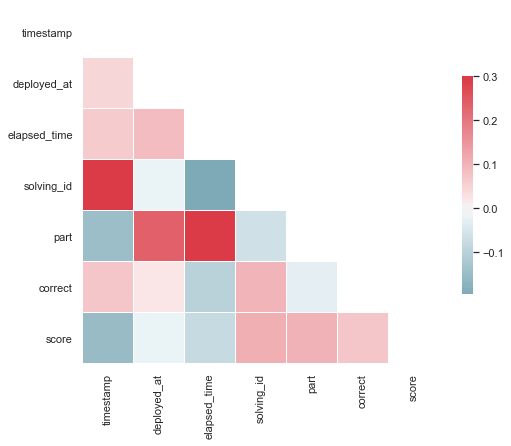

In [51]:
sns.set(style="white")
corr = dfm.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(8,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
dfm.columns

Index(['user_id', 'timestamp', 'solving_id', 'question_id', 'user_answer',
       'elapsed_time', 'action_type', 'item_id', 'source', 'platform',
       'cursor_time', 'bundle_id', 'explanation_id', 'correct_answer', 'part',
       'tags', 'deployed_at', 'correct', 'score'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C90CB8B08>,
      dtype=object)

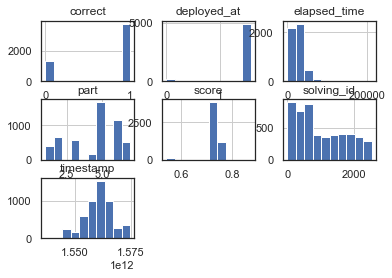

In [53]:
dfm.hist()

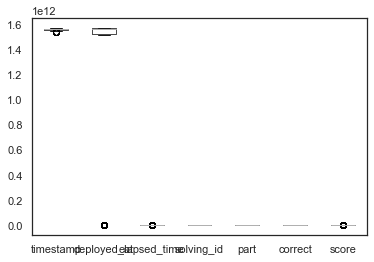

In [55]:
dfm.boxplot(grid=False)

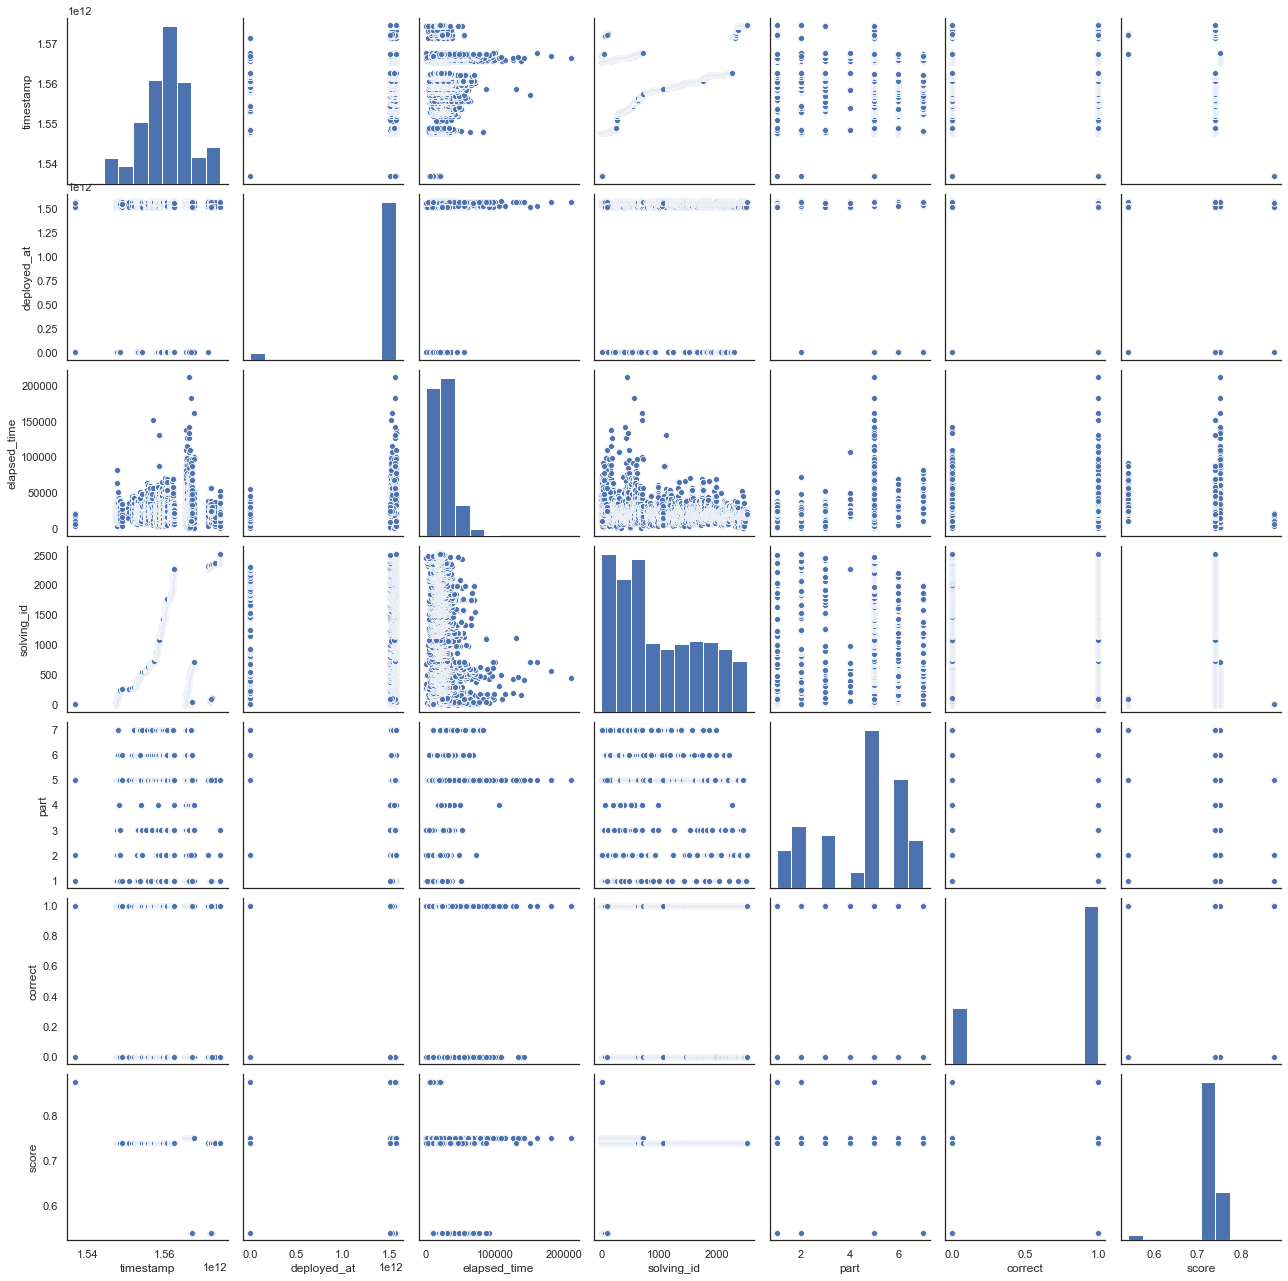

In [56]:
sns.pairplot(dfm)

In [57]:
#Calculate the correlation coefficients
corr = dfm.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,timestamp,deployed_at,elapsed_time,solving_id,part,correct,score
timestamp,1.000000,0.050000,0.060000,0.350000,-0.150000,0.070000,-0.150000
deployed_at,0.050000,1.000000,0.090000,-0.020000,0.240000,0.020000,-0.020000
elapsed_time,0.060000,0.090000,1.000000,-0.190000,0.330000,-0.100000,-0.080000
solving_id,0.350000,-0.020000,-0.190000,1.000000,-0.060000,0.100000,0.110000
part,-0.150000,0.240000,0.330000,-0.060000,1.000000,-0.030000,0.100000
correct,0.070000,0.020000,-0.100000,0.100000,-0.030000,1.000000,0.070000
score,-0.150000,-0.020000,-0.080000,0.110000,0.100000,0.070000,1.000000


TypeError: can only concatenate str (not "float") to str

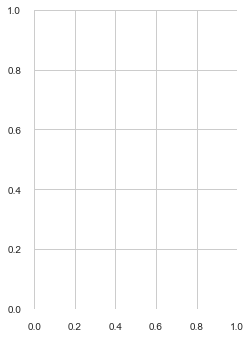

In [73]:
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.boxplot(dfm,color='green',orient='v')
plt.tight_layout() 

In [61]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dfm)
prof.to_notebook_iframe()

In [23]:
#prof.to_file(output_file='./dfm.html')